<a href="https://colab.research.google.com/github/Stacy067/Data-Analysis-for-Python/blob/main/4_3_kosis_mini_project_%EA%B9%80%EC%84%9C%ED%98%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## KOSIS 에서 관심있는 데이터 찾아 분석하기

KOSIS에서는 국내, 국제, 북한등의 주요 통계를 한 곳에 모아 이용자가 원하는 통계를 한번에 찾을 수 있도록 통계청이 제공하는 서비스입니다.  
경제, 사회, 환경 등 30개분야의 데이터를 제공해줍니다.
* https://kosis.kr/index/index.do

## pandas로 파일 불러오고 확인해보기

<img src = 'https://pandas.pydata.org/docs/_images/02_io_readwrite.svg'>

In [ ]:
import os

os.getcwd()

'/content'

In [ ]:
# pandas, numpy 를 불러옵니다.
import pandas as pd
import numpy as np

In [ ]:
import glob
glob.glob("*.csv")

['kosis-hh-macro-prudence-raw-park.csv', 'kosis-credit-raw-past.csv']

In [ ]:
df = pd.read_csv("kosis-hh-macro-prudence-raw-park.csv", encoding="cp949")

In [ ]:
# shape속성을 통해 DataFrame의 행과 열에 대한 정보를 확인할 수 있습니다.
df.shape

(528, 5)

In [ ]:
print(df.shape)
display(df.head(2))

(528, 5)


,부채보유 여부별,소득5분위별,시점,항목,데이터
0,전체,전체,2013,자산 (만원),32688.0
1,전체,전체,2013,금융자산 (만원),8457.0


In [ ]:
# 컬럼명 변경
df.columns = ['부채보유여부', '소득5분위','시점', '항목', '데이터']
df.head(2)

,부채보유여부,소득5분위,시점,항목,데이터
0,전체,전체,2013,자산 (만원),32688.0
1,전체,전체,2013,금융자산 (만원),8457.0


## 데이터 전처리 및 타입 변경하기
* astype 으로 데이터 타입 변경

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 528 entries, 0 to 527
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   부채보유여부  528 non-null    object 
 1   소득5분위   528 non-null    object 
 2   시점      528 non-null    int64  
 3   항목      528 non-null    object 
 4   데이터     528 non-null    float64
dtypes: float64(1), int64(1), object(3)
memory usage: 20.8+ KB


In [ ]:
df.describe(include="object")

,부채보유여부,소득5분위,항목
count,528,528,528
unique,2,6,11
top,전체,전체,자산 (만원)
freq,264,88,48


## 사용하지 않는 데이터 제거

In [ ]:
df.describe(include="object")

,부채보유여부,소득5분위,항목
count,528,528,528
unique,2,6,11
top,전체,전체,자산 (만원)
freq,264,88,48


In [ ]:
# drop함수를 통해 DataFrame안에 있는 행을 제거해줄 수 있습니다.
# 데이터안의 '연령별' column안에 있는 '계'는 사용하지 않을 예정이기 때문에 제거합니다.
# 데이터안의 '암검진별' column안에 있는 '계'는 사용하지 않을 예정이기 때문에 제거합니다.
# 데이터안의 '성별' column안에 있는 '합계'는 사용하지 않을 예정이기 때문에 제거합니다.
# 이후 index를  다시 재지정해 준 뒤 기존의 index column을 제거합니다.
# df

df = df[df["부채보유여부"] != "전체"]
df = df[df["소득5분위"] != "전체"]
df.shape

(220, 5)

In [ ]:
df.describe(include="object")

,부채보유여부,소득5분위,항목
count,220,220,220
unique,1,5,11
top,부채 보유,소득1분위,자산 (만원)
freq,220,44,20


## 일부 데이터 확인하기

In [ ]:
# 판다스의 head() 함수로 DataFrame의 앞쪽 데이터를 괄호 안에 지정한 개수만큼 얻어올 수 있습니다.
# 지정하지 않으면 기본값인 5개를 얻어오게 됩니다.
df.head(2)

,부채보유여부,소득5분위,시점,항목,데이터
308,부채 보유,소득1분위,2013,자산 (만원),14989.0
309,부채 보유,소득1분위,2013,금융자산 (만원),2528.0


In [ ]:
# 판다스의 tail() 함수로 DataFrame의 뒤쪽 데이터를 괄호 안에 지정한 개수만큼 얻어올 수 있습니다.
# 지정하지 않으면 기본값인 5개를 얻어오게 됩니다.
df.tail(2)

,부채보유여부,소득5분위,시점,항목,데이터
526,부채 보유,소득5분위,2016,금융부채/금융자산 (%),68.3
527,부채 보유,소득5분위,2016,원리금상환액/처분가능소득 (%),30.5


In [ ]:
# describe() 함수로 DataFrame에 저장된 숫자 데이터의 요약 통계량을 확인 할 수 있습니다.
# df에 숫자데이터는 '시점' column만 존재하기 때문에 '시점' column만 요약 통계량이 나오게 됩니다.
df.describe().round(2)

,시점,데이터
count,220.00,220.00
mean,2014.50,6013.47
std,1.12,12961.91
min,2013.00,21.20
25%,2013.75,84.10
50%,2014.50,782.00
75%,2015.25,5768.25
max,2016.00,86857.00


## 데이터 색인하기

In [ ]:
df[df["항목"] == "금융부채/금융자산 (%)"]

,부채보유여부,소득5분위,시점,항목,데이터
317,부채 보유,소득1분위,2013,금융부채/금융자산 (%),86.5
328,부채 보유,소득1분위,2014,금융부채/금융자산 (%),93.0
339,부채 보유,소득1분위,2015,금융부채/금융자산 (%),82.3
350,부채 보유,소득1분위,2016,금융부채/금융자산 (%),84.7
361,부채 보유,소득2분위,2013,금융부채/금융자산 (%),86.1
372,부채 보유,소득2분위,2014,금융부채/금융자산 (%),81.8
383,부채 보유,소득2분위,2015,금융부채/금융자산 (%),85.6
394,부채 보유,소득2분위,2016,금융부채/금융자산 (%),78.4
405,부채 보유,소득3분위,2013,금융부채/금융자산 (%),66.1
416,부채 보유,소득3분위,2014,금융부채/금융자산 (%),71.8


In [ ]:
# 연령별 unique 값을 확인합니다.
df["소득5분위"].unique()

array(['소득1분위', '소득2분위', '소득3분위', '소득4분위', '소득5분위'], dtype=object)

In [ ]:
# 연령대 파생변수를 생성합니다.
df["연령대"] = df["연령별"].str[0] + "0대"
df.head()

In [ ]:
# pandas, numpy, seaborn, matplotlib.pyplot 을 불러옵니다.
import pandas as pd
import numpy as np
import seaborn as sns

## 한글폰트 설정하기

In [ ]:
# 데이터 시각화 도구에서 한글을 그대로 출력하게 되면 글자가 깨져서 나오게 되기 때문에 글꼴설정을 해줘야 한다.
def get_font_family():
    """
    시스템 환경에 따른 기본 폰트명을 반환하는 함수
    """
    import platform
    system_name = platform.system()

    if system_name == "Darwin" :
        font_family = "AppleGothic"
    elif system_name == "Windows":
        font_family = "Malgun Gothic"
    else:
        # Linux(colab)
        !apt-get install fonts-nanum -qq  > /dev/null
        !fc-cache -fv

        import matplotlib as mpl
        mpl.font_manager._rebuild()
        findfont = mpl.font_manager.fontManager.findfont
        mpl.font_manager.findfont = findfont
        mpl.backends.backend_agg.findfont = findfont

        font_family = "NanumBarunGothic"
    return font_family

In [ ]:
# 위에서 만든 함수를 통해 시스템 폰트를 불러와줍니다.
get_font_family()

/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


'NanumBarunGothic'

In [ ]:
import matplotlib.pyplot as plt

# 시각화를 위한 폰트설정
# 위에서 만든 함수를 통해 시스템 폰트를 불러와서 font_family라는 변수에 할당합니다.
plt.style.use("ggplot")

font_family = get_font_family()
# 폰트설정
plt.rc("font", family=font_family)
# 마이너스 폰트 설정
plt.rc("axes", unicode_minus=False)

%config InlineBackend.figure_format = 'retina'

/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


### 폰트설정 확인하기

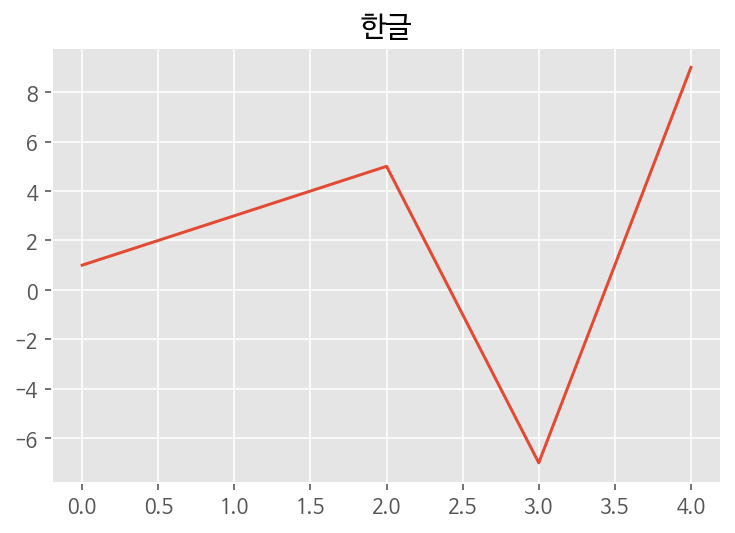

In [ ]:
# 한글 폰트가 정상적으로 작동하는지 확인하기
pd.Series([1, 3, 5, -7, 9]).plot(title="한글")

In [ ]:
# "항목" column의 value별 개수를 확인해 봅니다.
df["항목"].value_counts()

자산 (만원)              20
금융자산 (만원)            20
부채 (만원)              20
금융부채 (만원)            20
처분가능소득(전년도) (만원)     20
원리금상환액(전년도) (만원)     20
부채/자산 (%)            20
부채/금융자산 (%)          20
부채/처분가능소득 (%)        20
금융부채/금융자산 (%)        20
원리금상환액/처분가능소득 (%)    20
Name: 항목, dtype: int64

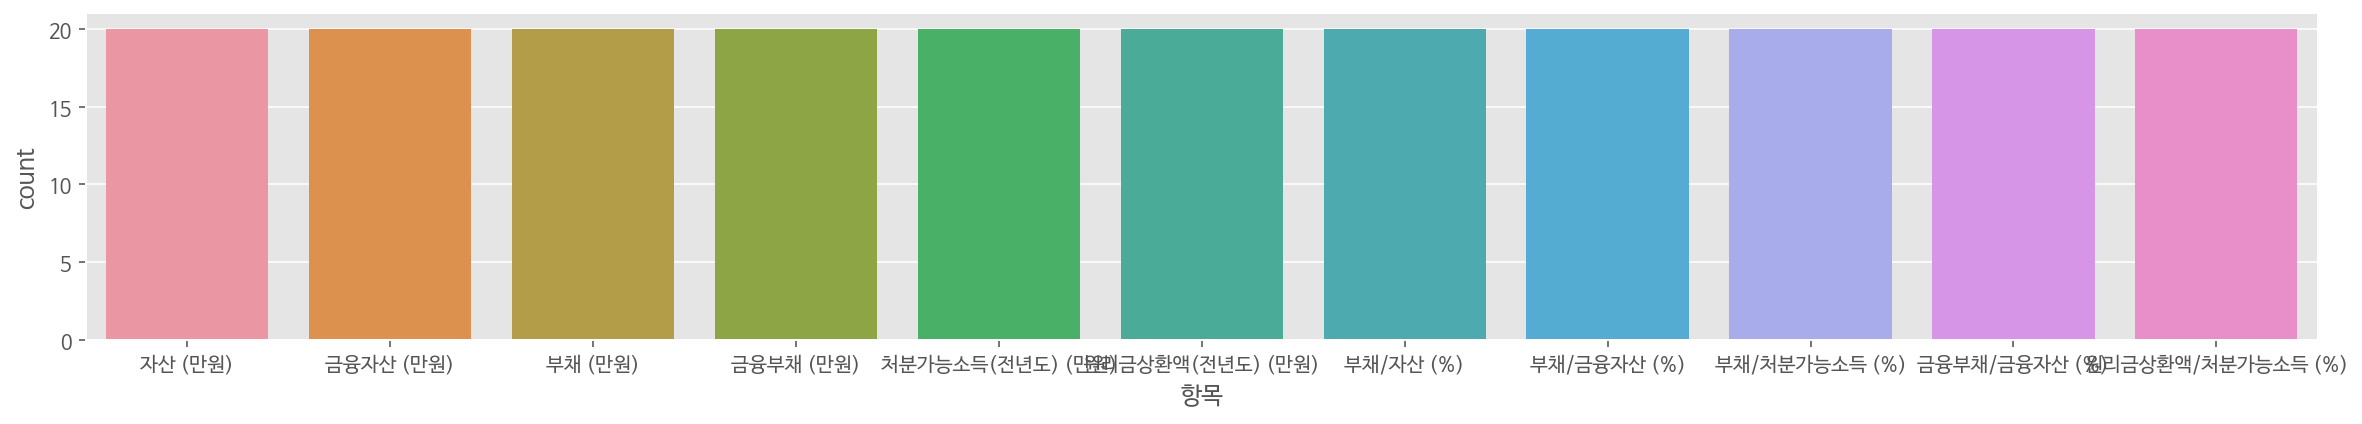

In [ ]:
plt.figure(figsize=(20, 3))
sns.countplot(data=df, x="항목")

### crosstab 으로 두 개의 빈도수 구하기

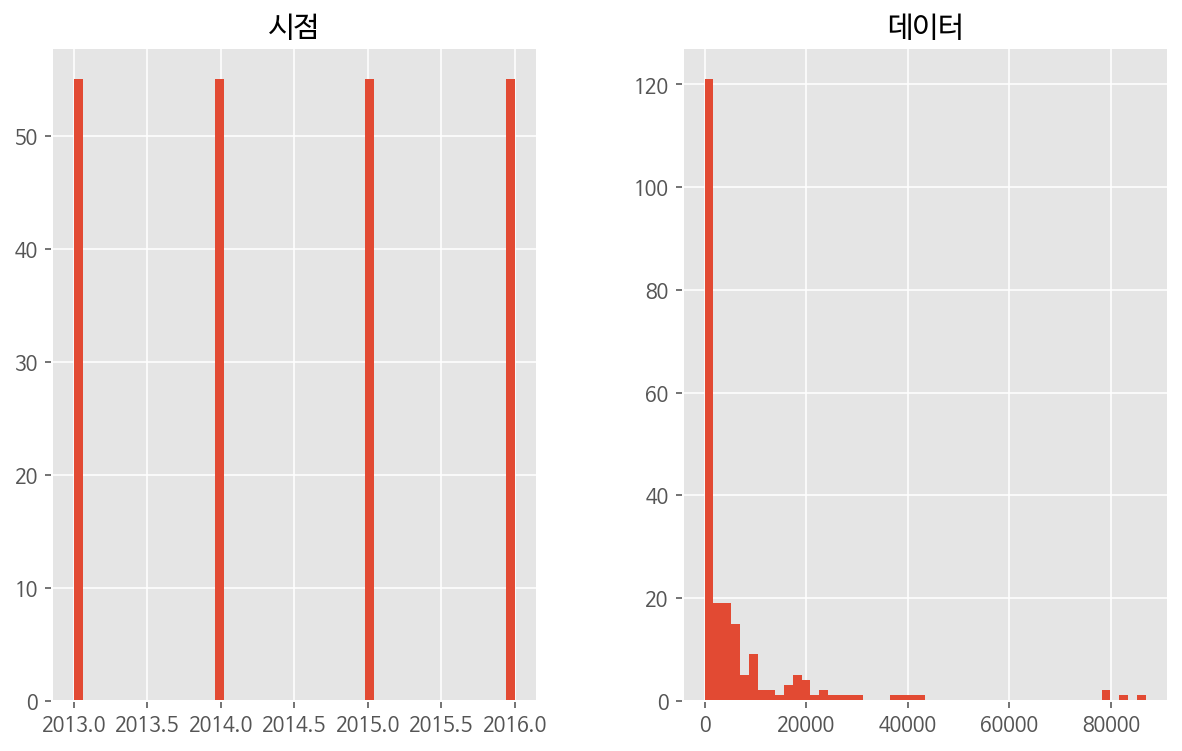

In [ ]:
df.hist(figsize=(10, 6), bins=50)
plt.show()

<Figure size 1728x432 with 0 Axes>

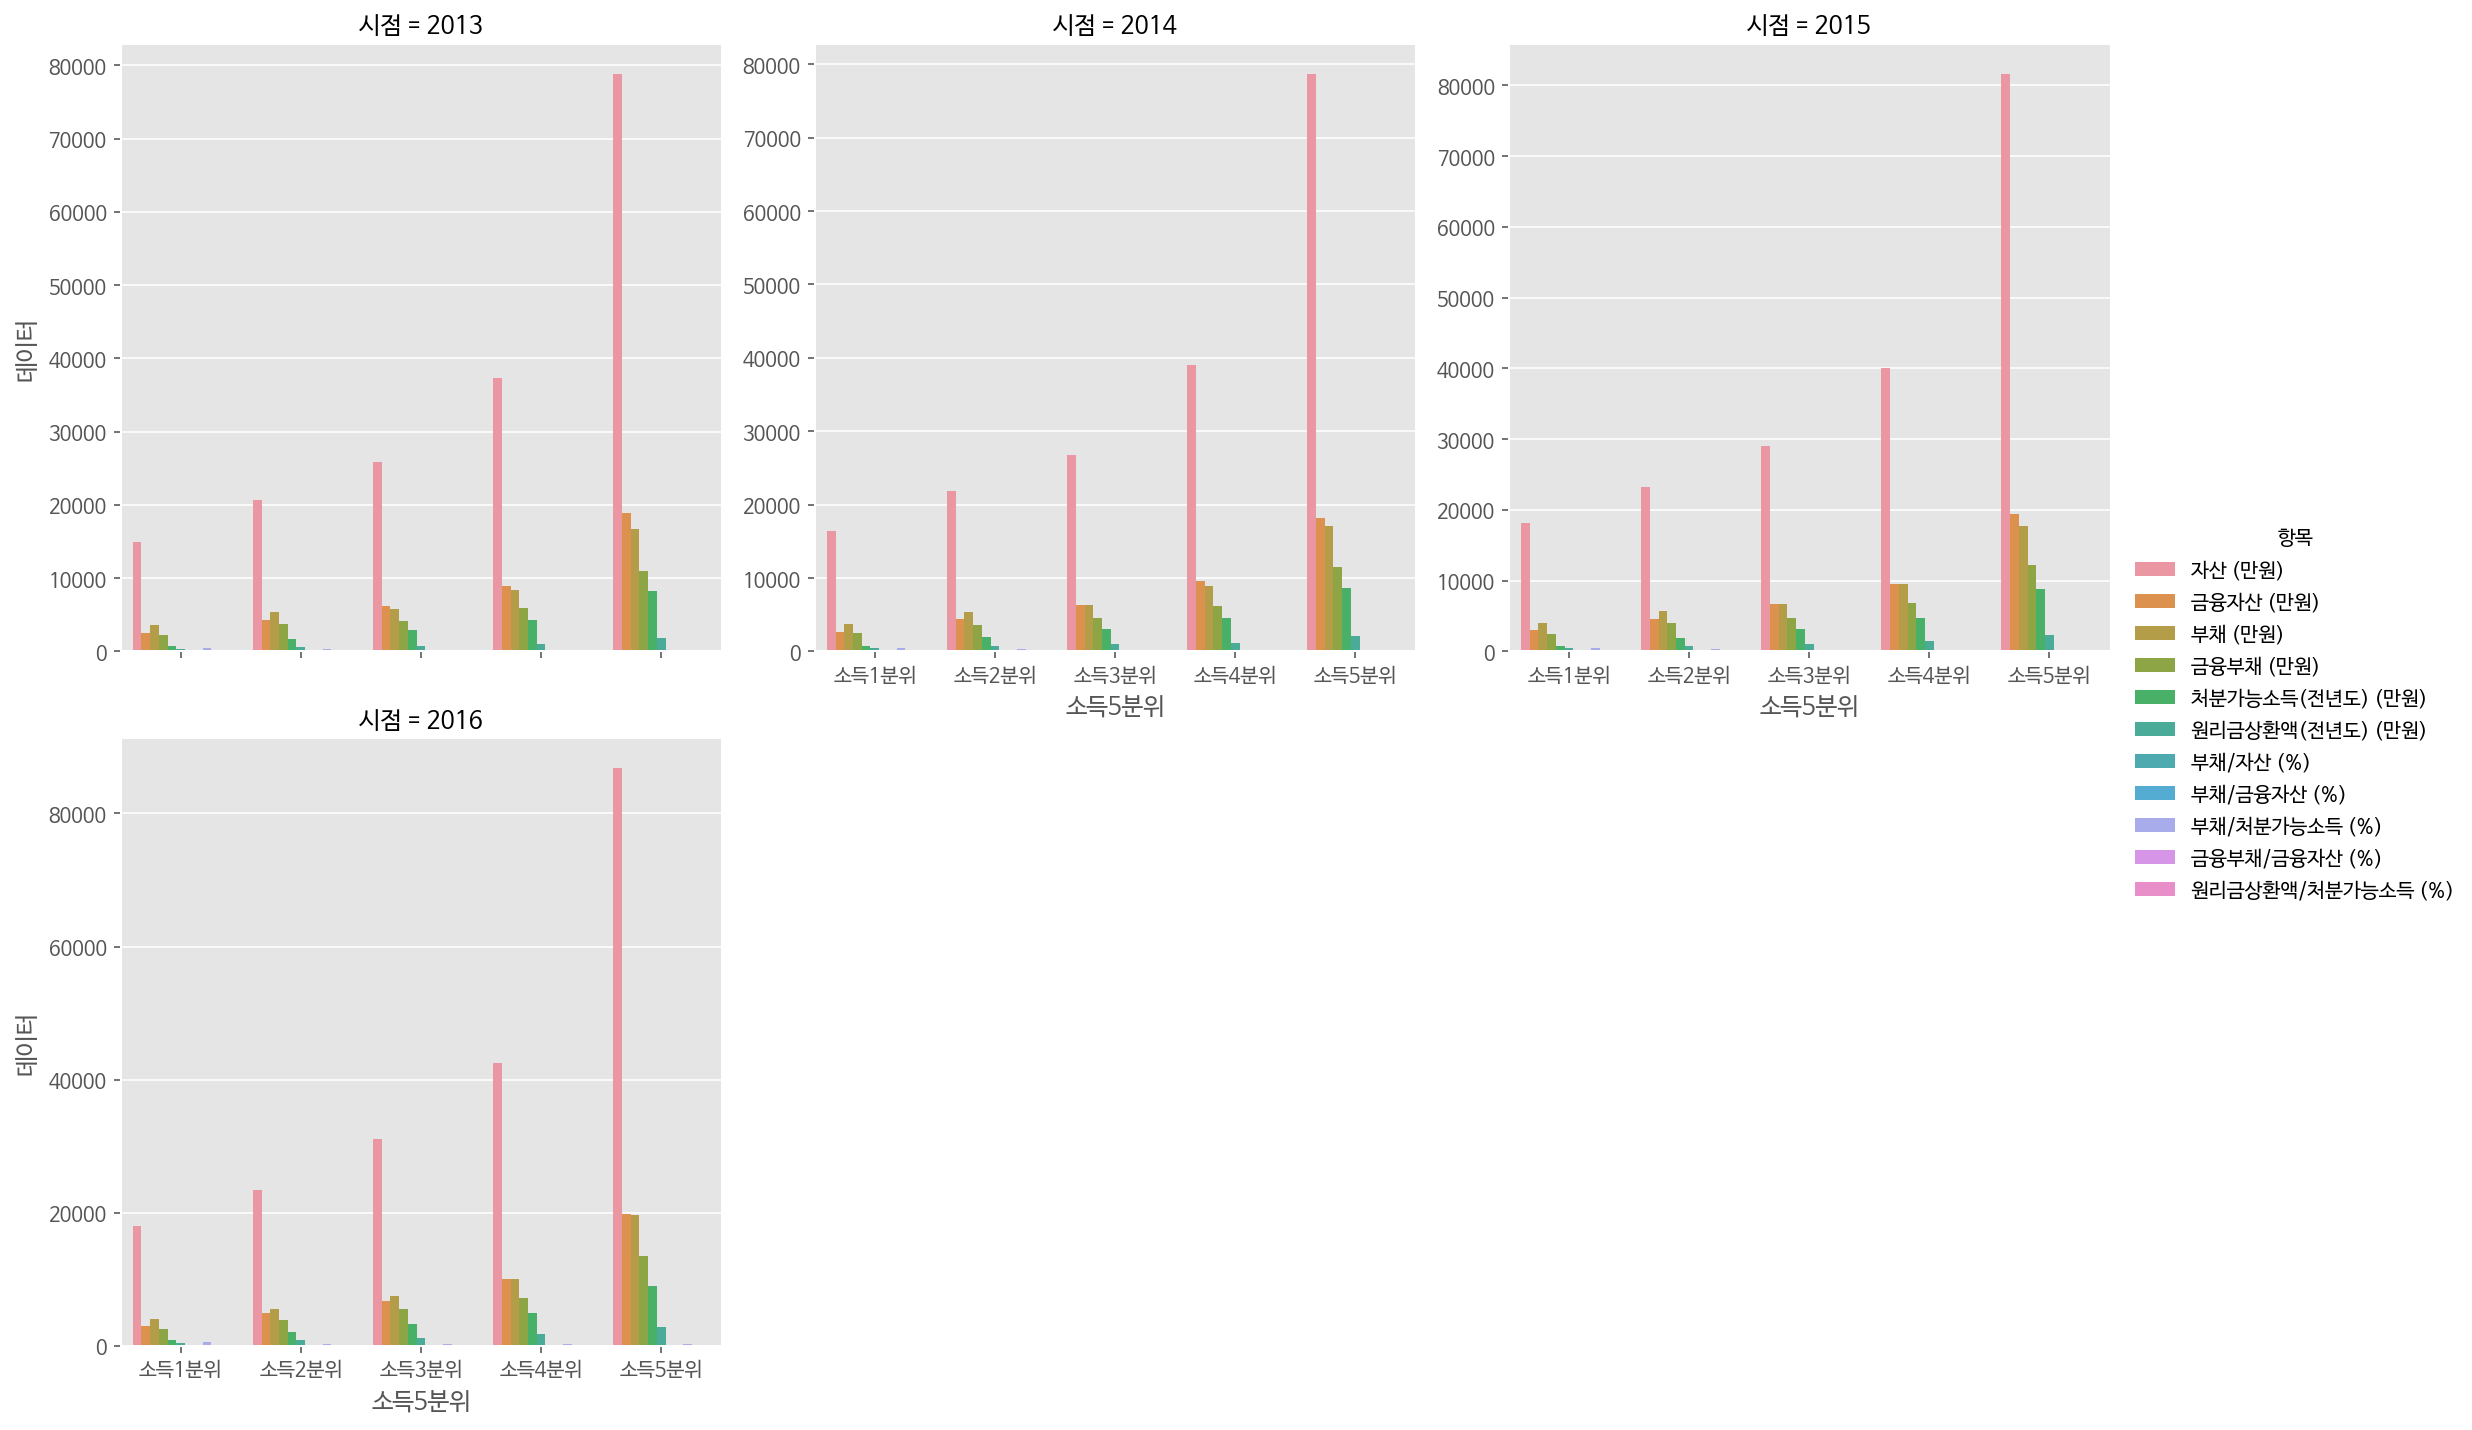

In [ ]:
# pointplot 으로 연도별 암검진 **합계** 수검인원을 시각화 합니다.

plt.figure(figsize=(24, 6))
sns.catplot(data=df, x="소득5분위", y="데이터", hue="항목", kind="bar", col="시점", col_wrap=3, sharey=False,
            estimator=np.sum, ci=None)

<Figure size 1728x432 with 0 Axes>

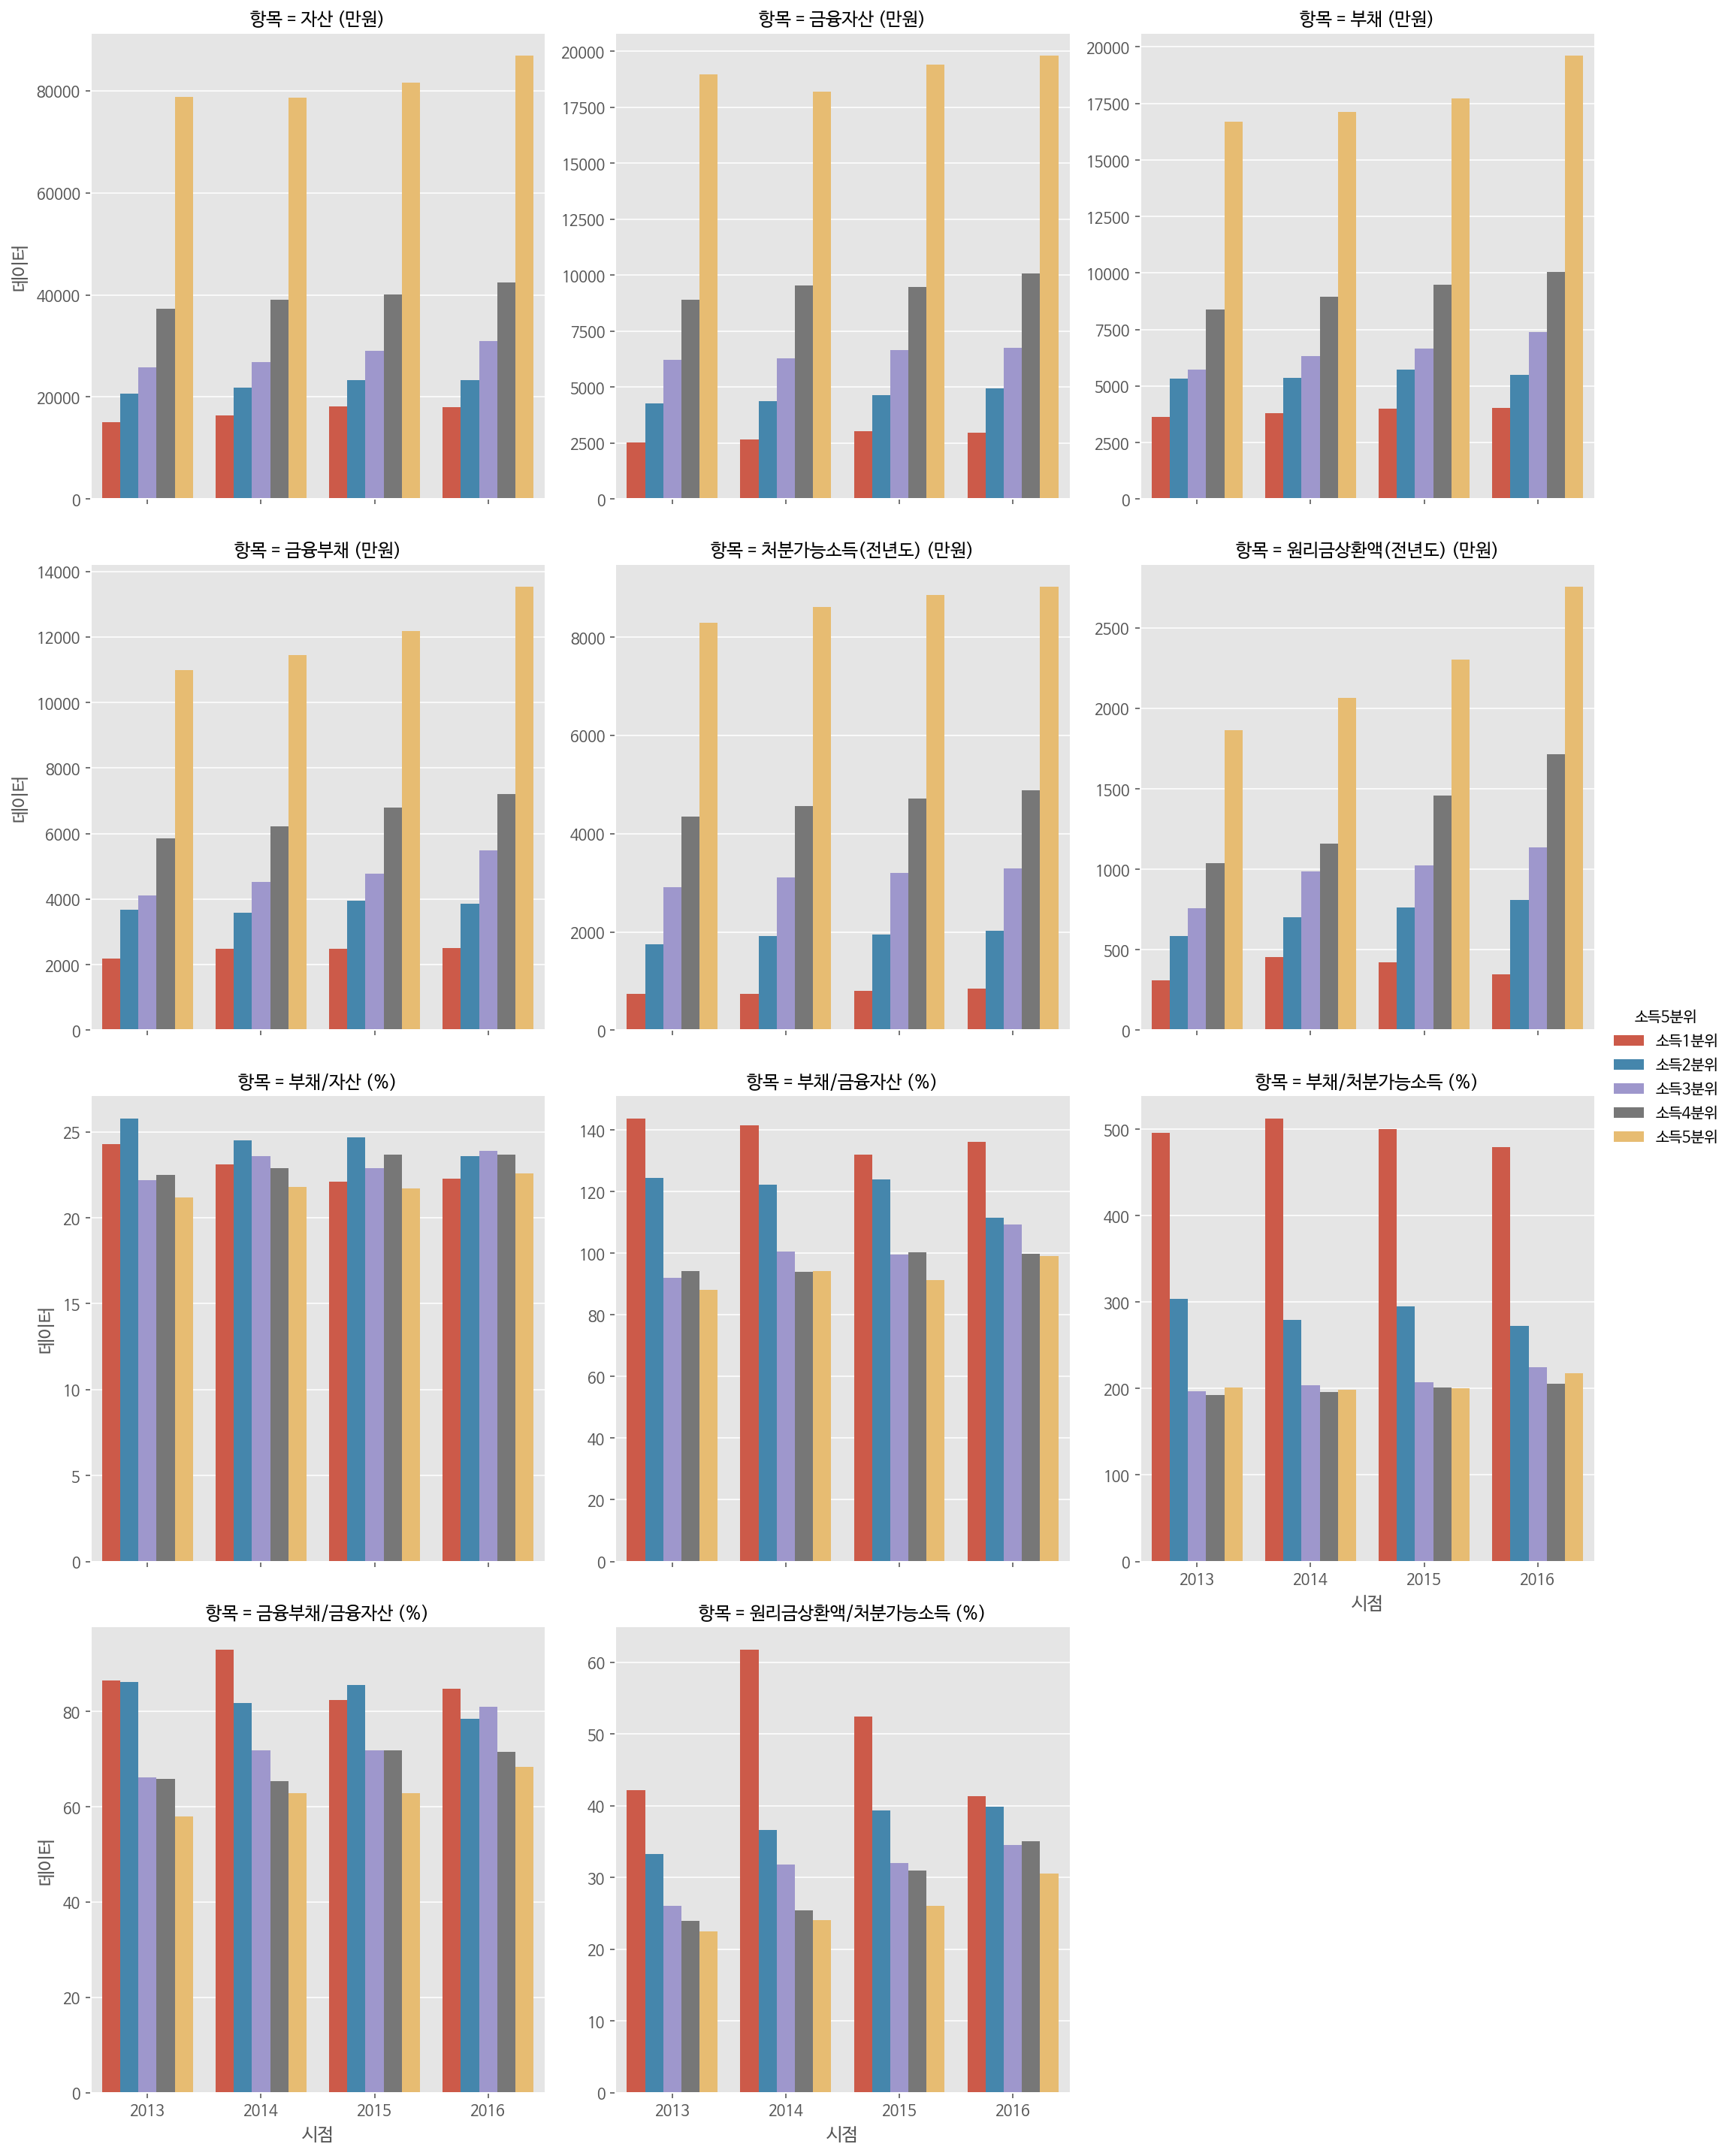

In [ ]:
# catplot 으로 연도별 암검진 수검인원 **합계**를 pointplot으로 시각화 합니다.

plt.figure(figsize=(24, 6))
sns.catplot(data=df, x="시점", y="데이터", hue="소득5분위", kind="bar", col="항목", col_wrap=3, sharey=False,
            estimator=np.sum, ci=None)

In [ ]:
# groupby([인덱스 컬럼 리스트])[연산에 사용할 컬럼].연산()

df.groupby(["항목", "소득5분위"])["데이터"].sum().unstack()

소득5분위,소득1분위,소득2분위,소득3분위,소득4분위,소득5분위
항목,,,,,
금융부채 (만원),9681.0,15090.0,18896.0,26072.0,48142.0
금융부채/금융자산 (%),346.5,331.9,290.7,274.5,252.0
금융자산 (만원),11198.0,18221.0,25950.0,37957.0,76343.0
부채 (만원),15459.0,21915.0,26098.0,36875.0,71135.0
부채/금융자산 (%),553.5,482.1,401.5,388.2,372.5
부채/자산 (%),91.8,98.6,92.6,92.8,87.3
부채/처분가능소득 (%),1989.2,1151.4,833.1,796.4,817.4
원리금상환액(전년도) (만원),1533.0,2854.0,3904.0,5373.0,8983.0
원리금상환액/처분가능소득 (%),197.7,149.1,124.3,115.4,103.0


In [ ]:
# pivot_table로 같은 결과가 나오게 연산하기
pd.pivot_table(data=df, index="항목", columns="소득5분위", values="데이터", aggfunc="sum")

소득5분위,소득1분위,소득2분위,소득3분위,소득4분위,소득5분위
항목,,,,,
금융부채 (만원),9681.0,15090.0,18896.0,26072.0,48142.0
금융부채/금융자산 (%),346.5,331.9,290.7,274.5,252.0
금융자산 (만원),11198.0,18221.0,25950.0,37957.0,76343.0
부채 (만원),15459.0,21915.0,26098.0,36875.0,71135.0
부채/금융자산 (%),553.5,482.1,401.5,388.2,372.5
부채/자산 (%),91.8,98.6,92.6,92.8,87.3
부채/처분가능소득 (%),1989.2,1151.4,833.1,796.4,817.4
원리금상환액(전년도) (만원),1533.0,2854.0,3904.0,5373.0,8983.0
원리금상환액/처분가능소득 (%),197.7,149.1,124.3,115.4,103.0
